# Titanic Yolcu Hayatta Kalma Tahmini – Proje Raporu

## 🎯 Proje Amacı
Bu projede, Titanic gemisinde bulunan yolcuların hayatta kalıp kalamayacağını **makine öğrenmesi** kullanarak tahmin etmeye çalıştım. Proje sürecinde **gözetimli öğrenme** tekniklerinden biri olan **Logistic Regression** algoritmasını uyguladım ve GridSearchCV ile modelin performansını iyileştirdim.

Bu proje sayesinde, veri ön işleme, keşifsel veri analizi (EDA), model seçimi, değerlendirme ve hiperparametre optimizasyonu gibi temel makine öğrenmesi aşamalarını uçtan uca deneyimlemiş oldum.

---

## 🧠 Kullanılan Veri Seti
Veri seti, `seaborn` kütüphanesi içerisinde yer alan **Titanic veri setidir**. Her bir satır bir yolcuyu temsil eder ve yaş, cinsiyet, sınıf gibi birçok özellik içerir. Tahmin etmeye çalıştığım hedef değişken ise `survived` (0 = hayatta kalmadı, 1 = hayatta kaldı) sütunudur.

---

## 🔍 Keşifsel Veri Analizi (EDA)

- Veri setinde toplam **891** gözlem ve **15** sütun vardı.
- Cinsiyet, yolcu sınıfı, yaş ve liman gibi değişkenlerin hayatta kalma oranı üzerinde etkili olduğu görüldü.
- Cinsiyete göre: Kadınların hayatta kalma oranı erkeklere göre oldukça yüksekti.
- Sınıfa göre: 1. sınıf yolcuların hayatta kalma oranı daha fazlaydı.
- Yaş değişkeni eksik değerlere sahipti, ortalama ile dolduruldu.
- Korelasyon matrisi ile yaş, ücret ve sınıf gibi bazı değişkenlerin `survived` ile ilişkili olduğu gözlendi.

---

## 🧼 Veri Ön İşleme

- `deck`, `alive`, `embark_town`, `who`, gibi bazı gereksiz sütunlar çıkarıldı.
- Eksik veriler:
  - `age`: ortalama ile dolduruldu.
  - `embarked`: en sık görülen liman ile dolduruldu.
- Kategorik değişkenler (cinsiyet, liman vs.) sayısal formata çevrildi (Label Encoding).
- Veriler eğitim ve test setine ayrıldı (%80 eğitim, %20 test).
- `StandardScaler` ile sayısal veriler ölçeklendirildi.

---

## ⚙️ Kullanılan Model ve Optimizasyon

### Seçilen Model:
- **Logistic Regression**: Basit, yorumlanabilir ve sınıflandırma problemleri için güçlü bir modeldir.

### Hiperparametre Optimizasyonu:
- `GridSearchCV` ile `C`, `penalty` ve `solver` parametreleri denendi.
- En iyi sonuç veren parametreler:
  - `C = 1`
  - `penalty = 'l2'`
  - `solver = 'liblinear'`

---

## 📈 Model Sonuçları

- **Test doğruluk skoru**: **%79.3**
- **Doğruluk (Accuracy)**, **Duyarlılık (Recall)** ve **F1 Skoru** dengeli çıktı.
- Model, "hayatta kalmayan" sınıfı (0) tahmin etmekte daha başarılıydı.
- "Hayatta kalan" sınıfında biraz daha düşük recall değeri görüldü (%69 civarı).

---

## 🧾 Confusion Matrix Yorumu

- Model, hayatta kalmayanları büyük oranda doğru tahmin etti.
- Hayatta kalanlar için bazı hatalı tahminler mevcut.
- Bu durum veri setindeki **sınıf dengesizliği** ile ilgili olabilir.


---

## 🚀 Geliştirme Fikirleri

- **Sınıf dengesizliği** için `SMOTE` ya da `class_weight='balanced'` parametresi denenebilir.
- Başka modeller (Random Forest, XGBoost) test edilerek karşılaştırma yapılabilir.
- Model, **Streamlit** ile arayüze dökülerek bir kullanıcıya sunulabilir.
- Aynı veri seti ile **Gözetimsiz Öğrenme** (k-means gibi) deneyleri yapılabilir.
- GPU destekli kütüphaneler (cuML vs.) ile proje hızlandırılabilir.

---

## ✍️ Genel Değerlendirme

Bu proje bana makine öğrenmesinin gerçek dünya verisi üzerinde nasıl uygulandığını anlamamda büyük katkı sağladı. Logistic Regression gibi temel bir algoritmayla dahi anlamlı sonuçlar elde edilebileceğini görmek çok motive ediciydi. İlerleyen dönemlerde bu projeyi geliştirip arayüz, farklı algoritmalar ve gerçek zamanlı veri ile daha büyük bir projeye dönüştürmek istiyorum.


In [3]:
# Veri işleme
import pandas as pd
import numpy as np

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Makine öğrenmesi modelleri ve yardımcılar
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
# Titanic veri setini yükle
titanic = sns.load_dataset('titanic')

# İlk 5 satırı incele
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Veri setinin boyutlarına bak
print("Veri seti boyutu:", titanic.shape)

# Hangi sütunlar var ve veri tipleri nedir?
print("\nVeri tipleri:")
print(titanic.dtypes)

# Eksik veri sayısı
print("\nEksik veri sayısı:")
print(titanic.isnull().sum())


Veri seti boyutu: (891, 15)

Veri tipleri:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Eksik veri sayısı:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [6]:
# Sayısal sütunlar için özet istatistikler
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Kategorik değişkenlerin frekansı
for col in ['sex', 'class', 'embarked', 'who', 'adult_male', 'deck', 'embark_town', 'alive']:
    print(f"\n{col} dağılımı:\n", titanic[col].value_counts())


sex dağılımı:
 sex
male      577
female    314
Name: count, dtype: int64

class dağılımı:
 class
Third     491
First     216
Second    184
Name: count, dtype: int64

embarked dağılımı:
 embarked
S    644
C    168
Q     77
Name: count, dtype: int64

who dağılımı:
 who
man      537
woman    271
child     83
Name: count, dtype: int64

adult_male dağılımı:
 adult_male
True     537
False    354
Name: count, dtype: int64

deck dağılımı:
 deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

embark_town dağılımı:
 embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

alive dağılımı:
 alive
no     549
yes    342
Name: count, dtype: int64


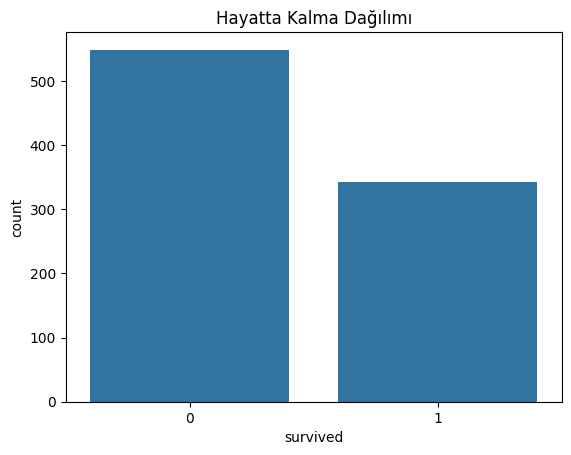

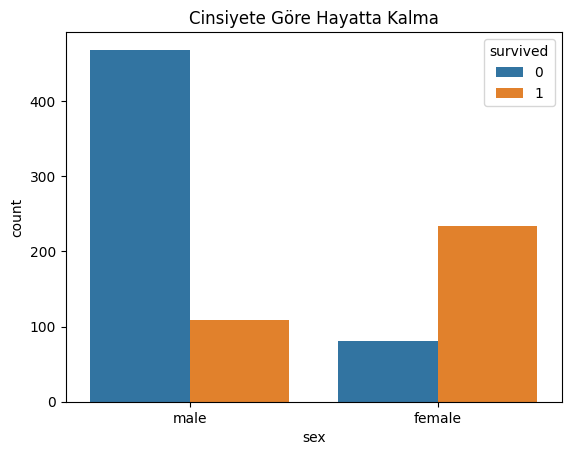

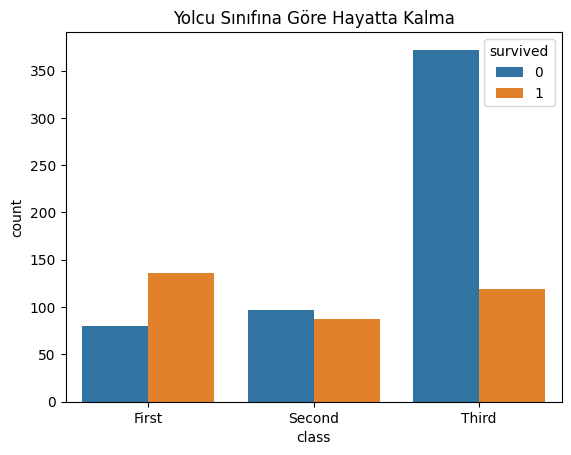

In [8]:
# Hayatta kalanların sayısı
sns.countplot(x='survived', data=titanic)
plt.title('Hayatta Kalma Dağılımı')
plt.show()

# Cinsiyete göre hayatta kalma
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Cinsiyete Göre Hayatta Kalma')
plt.show()

# Sınıfa göre hayatta kalma
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Yolcu Sınıfına Göre Hayatta Kalma')
plt.show()

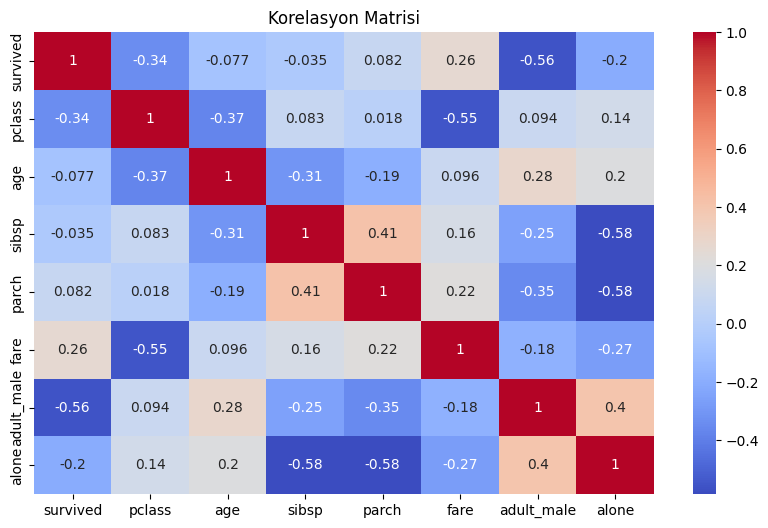

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Korelasyon Matrisi')
plt.show()

In [10]:
# Kopya veri seti oluşturalım
df = titanic.copy()

# Gereksiz sütunları çıkar
df.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class', 'pclass'], axis=1, inplace=True)


In [11]:
# Daha güvenli ve önerilen yöntem
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [12]:
# Cinsiyet ve embarked sütunları için label encoding
label_enc = LabelEncoder()
df['sex'] = label_enc.fit_transform(df['sex'])          # female: 0, male: 1
df['embarked'] = label_enc.fit_transform(df['embarked'])# C:0, Q:1, S:2


In [13]:
# Hedef değişken
y = df['survived']

# Giriş değişkenleri
X = df.drop('survived', axis=1)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Modeli oluştur
logreg = LogisticRegression(max_iter=1000)

# Eğit
logreg.fit(X_train_scaled, y_train)

# Test verisiyle tahmin yap
y_pred = logreg.predict(X_test_scaled)

# Sonuçları yazdır
print("Logistic Regression Başarı Skoru:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Logistic Regression Başarı Skoru: 0.7932960893854749

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [17]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

print("Decision Tree Başarı Skoru:", accuracy_score(y_test, tree_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, tree_pred))


Decision Tree Başarı Skoru: 0.7597765363128491

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       105
           1       0.70      0.74      0.72        74

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.76      0.76      0.76       179



In [18]:
# Parametreler
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # l1 için sadece 'liblinear' veya 'saga' kullanabilirsin
}

# GridSearchCV
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# En iyi parametreler
print("En iyi parametreler:", grid.best_params_)
print("En iyi doğruluk skoru (CV):", grid.best_score_)

# Test seti üzerindeki doğruluk
best_model = grid.best_estimator_
y_best_pred = best_model.predict(X_test_scaled)

print("Test seti doğruluğu (optimized model):", accuracy_score(y_test, y_best_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_best_pred))


En iyi parametreler: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
En iyi doğruluk skoru (CV): 0.7977248104008667
Test seti doğruluğu (optimized model): 0.7932960893854749

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



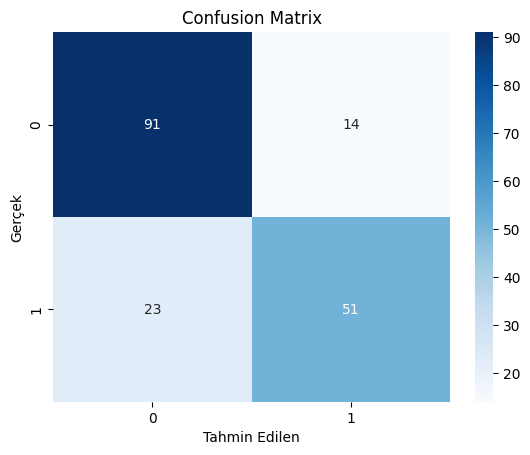

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()